In [1]:
# Importing All Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import yfinance as yf
import warnings
import math

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = yf.download('BTC-USD') # 10 Years Historical Data

[*********************100%***********************]  1 of 1 completed


In [27]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


In [26]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-06,62084.988281,62959.570312,61833.148438,62818.953125,62818.953125,14776233667
2024-10-07,62819.109375,64443.707031,62152.550781,62236.660156,62236.660156,34253562610
2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,62131.968750,28134475157
2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,60582.101562,27670982363
2024-10-10,60580.855469,61197.300781,60375.671875,61165.355469,61165.355469,28360822784


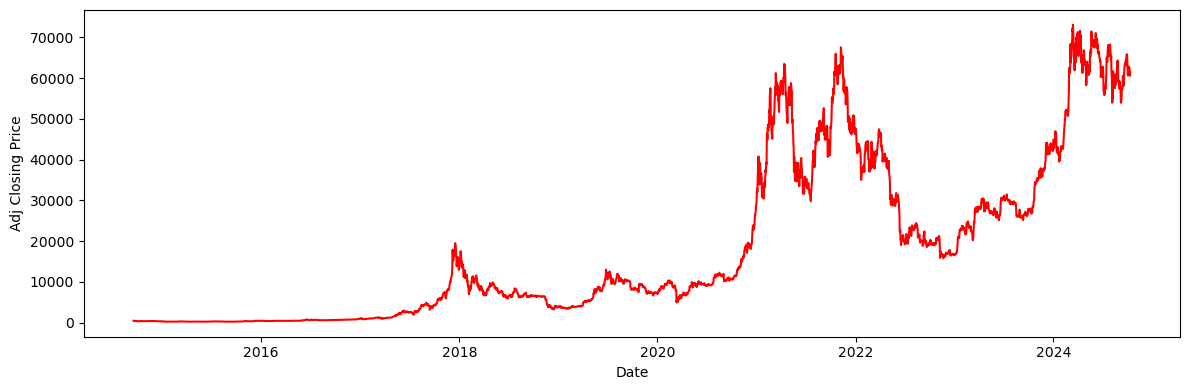

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Adj Close'], color='red')

plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.tight_layout()
plt.show()

In [5]:
# Train Test Split

to_row = int(len(df)*0.9)

training_data = list(df[0:to_row] ['Adj Close'])
testing_data = list(df[to_row:] ['Adj Close'])

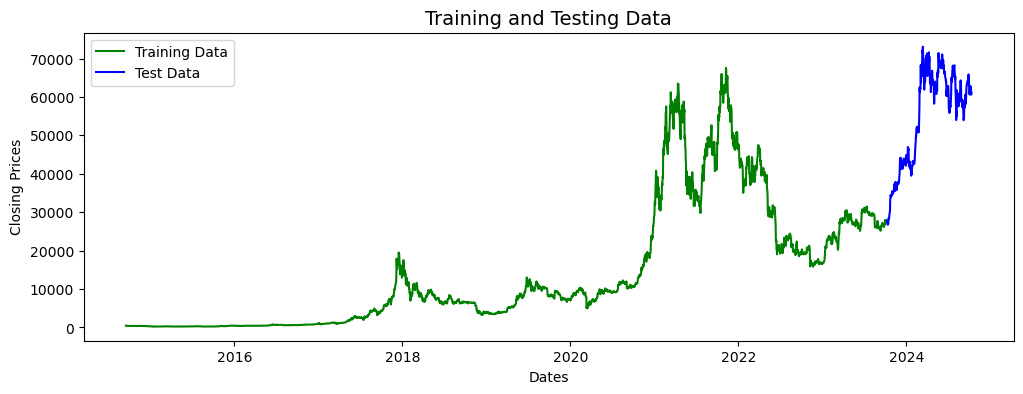

In [24]:
plt.figure(figsize=(12,4))
# Plot the training data
plt.plot(df.index[:to_row], df['Adj Close'][:to_row], label='Training Data', color='green')

# Plot the test data
plt.plot(df.index[to_row:], df['Adj Close'][to_row:], label='Test Data', color='blue')

# Set the title and labels
plt.title('Training and Testing Data', fontsize=14, loc='center')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
model_prediction = []
n_test_obser = len(testing_data)

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Loop through the trainig observations and fit the ARIMA model
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))  
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_prediction.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [9]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3676
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -30158.555
Date:                Thu, 10 Oct 2024   AIC                          60327.109
Time:                        18:10:24   BIC                          60358.156
Sample:                             0   HQIC                         60338.162
                               - 3676                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0462      0.009     -5.350      0.000      -0.063      -0.029
ar.L2          0.0231      0.009      2.550      0.011       0.005       0.041
ar.L3          0.0097      0.009      1.089      0.2

##### Even though the heading says SARIMAX Results, it shows that the model is ARIMA(4, 1, 0). This provides detailed ARIMA model results, showing the coefficients, p-values, and model fit statistics. It's a good way to clearly see that an ARIMA model is being used, even though it may leverage SARIMAX internally.

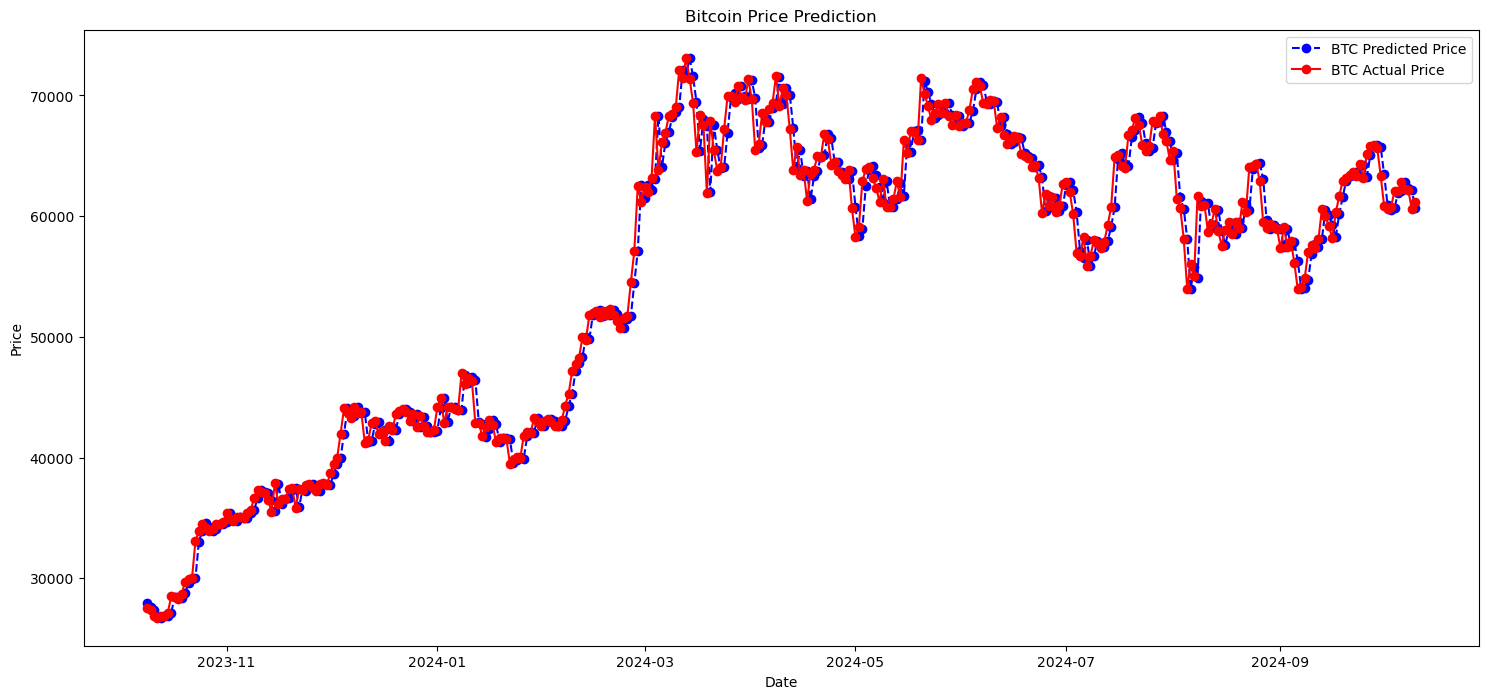

In [25]:
plt.figure(figsize=(18,8))

date_range = df[to_row:].index
plt.plot(date_range,model_prediction,color='blue', linestyle='dashed', marker='o', label='BTC Predicted Price')
plt.plot(date_range,testing_data,color='red', marker='o',label='BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Model Performance

In [17]:
# Calculate MSE
mse = mean_squared_error(testing_data[:n_test_obser], model_prediction)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(testing_data[:n_test_obser], model_prediction)

# Calculate R²
r2 = r2_score(testing_data[:n_test_obser], model_prediction)

# Calculating Mean Absolute Percentage Error
mape = np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))

# Print the metrics
print('Mean Absolute Percentage Error (MAPE): '+str(mape))
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Percentage Error(MAPE): 0.01945584287518028
Mean Squared Error (MSE): 2424689.999098682
Root Mean Squared Error (RMSE): 1557.141611767755
Mean Absolute Error (MAE): 1090.6244611014822
R-squared (R²): 0.9843363682205707


### Model Summary:

1. The MAPE of 1.94% shows the model makes relatively 98.06% accurate predictions.
2. The MSE and RMSE values, while large, are in line with the scale of the dataset.
3. The MAE of 1,926 units suggests the model is generally close to the actual values.
4. The R² value of 0.9843 indicates that the model explains 98.43%, a high proportion of the variance in the data, which is a sign of a good fit.

Overall, The ARIMA model performs well, with strong accuracy metrics and a high R² value indicating a good fit for the time series data.